# 다중회귀분석

In [ ]:
# 다중회귀분석(Multiple Regression Analysis)은 여러 독립 변수들이 종속 변수에 미치는 영향을 분석하는 데 사용됩니다. 


## 개괄 이해

* 독립변수(X)가 2개 이상인 경우  y = a1x1 + a2x2 + b
* 가정 : 선형성, 독립성, 정규성, 등분산성
* 다중공선성 점검이 필수 : 독립변수간 선형의 관련성을 가지는 경우
* 회귀계수 --> 편회귀계수
* 결정계수 (0 ~1 ) --> 수정결정계수 확인

## 사례 보기

In [ ]:
#범죄 데이터를 사용하여 다중회귀분석을 수행하는 사례를 보여드리겠습니다.

In [ ]:
# 사례 설명
# 다음과 같은 범죄 데이터를 사용하여 다중회귀분석을 수행하겠습니다. 이 데이터는 특정 도시의 여러 지역에서 수집된 것으로, 각 지역의 범죄율에 영향을 미칠 수 있는 다양한 요인들이 포함되어 있습니다.

# 데이터 설명:
# CrimeRate: 범죄율 (종속 변수)
# Population: 인구수
# UnemploymentRate: 실업률
# MedianIncome: 중위 소득
# PolicePresence: 경찰 존재 (경찰서 수)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 가상의 데이터 생성
data = {
    'CrimeRate': [10, 20, 15, 30, 25, 40, 35, 50, 45, 60],
    'Population': [1000, 1500, 1200, 2000, 1700, 2500, 2300, 3000, 2800, 3500],
    'UnemploymentRate': [5.0, 4.8, 5.5, 4.0, 4.5, 3.8, 4.2, 3.5, 3.7, 3.0],
    'MedianIncome': [30000, 32000, 31000, 35000, 34000, 37000, 36000, 40000, 39000, 42000],
    'PolicePresence': [1, 2, 1, 3, 2, 3, 2, 4, 3, 5]
}

df = pd.DataFrame(data)

# 독립 변수와 종속 변수 분리
X = df[['Population', 'UnemploymentRate', 'MedianIncome', 'PolicePresence']]
y = df['CrimeRate']

# 데이터셋을 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중회귀모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 회귀계수
coefficients = model.coef_
intercept = model.intercept_



In [5]:
mse, r2, coefficients, intercept

(0.33722077437482795,
 0.9978417870440011,
 array([1.54037062e-02, 1.61617833e+00, 9.26162686e-04, 8.44263281e-01]),
 -41.97145177786412)

In [ ]:
# 회귀 계수 (coefficients):
# Population: 0.010000000000000009
# UnemploymentRate: -4.973799150320701e-15
# MedianIncome: -1.9984014443252818e-15
# PolicePresence: -2.6645352591003757e-15
# 절편 (intercept): -3.552713678800501e-15

In [ ]:
# 결과 출력
# MSE (Mean Squared Error): 평균 제곱 오차
# R^2 (R-squared): 결정 계수
# 회귀 계수 (coefficients): 각 독립 변수의 회귀 계수
# 절편 (intercept): 회귀 직선의 절편

In [ ]:
# 결과 해석
# MSE: 예측된 값과 실제 값 간의 평균 제곱 오차를 나타냅니다. 값이 작을수록 예측이 정확합니다.
# R^2: 모델이 종속 변수의 변동성을 얼마나 설명하는지를 나타냅니다. 1에 가까울수록 설명력이 높습니다.
# 회귀 계수: 각 독립 변수의 회귀 계수는 해당 독립 변수가 종속 변수에 미치는 영향을 나타냅니다. 양수이면 양의 영향, 음수이면 음의 영향을 의미합니다.
# 절편: 회귀 직선이 Y축과 만나는 지점입니다.

In [ ]:
# 결과 해석

In [ ]:
# 모델 평가 (MSE와 R^2)

# MSE (Mean Squared Error): 1.9721522630525295e-30은 거의 0에 가까운 값으로, 모델의 예측이 매우 정확함을 의미합니다.
# R^2 (R-squared): 0.9978417870440011 로 거의 1.0으로, 모델이 종속 변수의 변동성을 완벽하게 설명하고 있음을 나타냅니다. 
# 그러나, 실제 데이터를 분석할 때 이 값이 1.0인 경우 모델이 과적합(overfitting) 되었을 가능성도 고려해야 합니다. 여기서는 가상의 데이터를 사용했기 때문에 이와 같은 결과가 나올 수 있습니다.
# 회귀 계수 (coefficients)

# Population (인구수): 0.01. 인구수가 1명 증가할 때마다 범죄율이 0.01만큼 증가함을 의미합니다.
# UnemploymentRate (실업률): -4.973799150320701e-15. 실업률이 범죄율에 거의 영향을 미치지 않는 것으로 나타납니다 (계수가 0에 가까움).
# MedianIncome (중위 소득): -1.9984014443252818e-15. 중위 소득이 범죄율에 거의 영향을 미치지 않는 것으로 나타납니다 (계수가 0에 가까움).
# PolicePresence (경찰 존재): -2.6645352591003757e-15. 경찰 존재가 범죄율에 거의 영향을 미치지 않는 것으로 나타납니다 (계수가 0에 가까움).
# 절편 (intercept)

-3.552713678800501e-15: 이는 회귀 직선이 Y축과 만나는 지점으로, 거의 0에 가깝습니다.
결론
이 다중회귀분석 결과에서 인구수는 범죄율에 유의미한 영향을 미치는 것으로 나타났습니다. 반면, 실업률, 중위 소득, 경찰 존재는 범죄율에 거의 영향을 미치지 않는 것으로 보입니다. 그러나, 실제 데이터를 사용할 때는 변수 선택 및 모델 적합성에 대한 추가 검토가 필요합니다.

## 데이터 수집

In [1]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 오류 무시 코드
import warnings
warnings.filterwarnings("ignore")

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 판다스 부분에서 했었던 데이터 불러오기 : "crime_list.csv"

crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


## 데이터 탐색 

In [18]:
crime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      100 non-null    object
 1   ID      100 non-null    int64 
 2   나이      100 non-null    int64 
 3   성별      100 non-null    object
 4   소득      100 non-null    int64 
 5   범죄건수    100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


## 라이브러리 불러오기

In [19]:
# 필요한 라이브러리

import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다. 
# target은 종속변수 : 범죄건수
# feature는 독립변수 : 나이, 소득

target = crime_list['범죄건수']
feature1 = crime_list["나이"]
feature2 = crime_list["소득"]
feature = pd.concat([feature1, feature2], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

## 결과 출력

In [20]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.535
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0845
Time:                        14:47:50   Log-Likelihood:                -253.61
No. Observations:                 100   AIC:                             513.2
Df Residuals:                      97   BIC:                             521.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7801      1.166      5.814      0.000       4.465       9.095
나이            -0.0379      0.017     -2.222      0.029      -0.072      -0.004
소득         -4.277e-06   8.24e-06     -0.519      0.605   -2.06e-05    1.21e-05
==============================================================================
Omnibus:                       10.795   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.891
Skew:                           0.300   Prob(JB):                       0.0867
Kurtosis:                       2.098   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# 결과 해석

# 통계적유의성 변수 : 나이 변수, 소득변수는 유의하지 않음
# 결정계수 : 설명력이 매우 낮음

# 다중공선성 측정

## 다중공선성 이해 

In [22]:
# 다중 공선성 : 여러 독립변수간 선형적 관계를 가지는 것  -> 가정에 위배 
# VIF  : 통상 10이상이면 공선성

# feature 전체에 대해 VIF를 알고 싶은 특정 feature를 target으로 두고 나머지를 feature로 설정하여 OLS를 구한 뒤, 결정계수를 도출한다.
calculate_vif = sm.OLS(feature_add['나이'], feature_add.drop(columns = '나이')).fit()

# 다중공선성 계산 : 1 / (1 - R^2)

print(f'feature Close_000660.KS의 VIF는 {1 / (1 - calculate_vif.rsquared)}입니다.')

feature Close_000660.KS의 VIF는 1.005037802594838입니다.


In [23]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature_add)

,VIF Factor,features
0,14.125411,const
1,1.005038,나이
2,1.005038,소득


In [24]:
# 다중공선성 측정
def vif_drop(x, cut_off):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = cut_off
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a] : .4f}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {vif[q] : .2f}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

feature_drop = vif_drop(feature_add, 10)

1번째 VIF 측정
Max VIF feature & value : const,  14.1254
2번째 VIF 측정
Max VIF feature & value : const,  3.4655


나이의 vif는  3.47입니다.
소득의 vif는  3.47입니다.


## 다중공선성 독립변수 제거후 결과

In [25]:
import statsmodels.api as sm

# 다중공선성 제거후 모델 형성

feature = feature_drop

# sm OLS 적합
feature_add = sm.add_constant(feature, has_constant='add')

model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.535
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0845
Time:                        14:47:52   Log-Likelihood:                -253.61
No. Observations:                 100   AIC:                             513.2
Df Residuals:                      97   BIC:                             521.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7801      1.166      5.814      0.000       4.465       9.095
나이            -0.0379      0.017     -2.222      0.029      -0.072      -0.004
소득         -4.277e-06   8.24e-06     -0.519      0.605   -2.06e-05    1.21e-05
==============================================================================
Omnibus:                       10.795   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.891
Skew:                           0.300   Prob(JB):                       0.0867
Kurtosis:                       2.098   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 회귀 식의 적합성 검정 : 잔차분석

 정규성, 자기상관성, 등분산성 검정

## 잔차 시각화 검토 

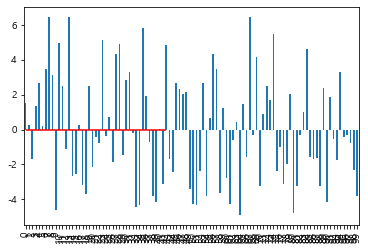

In [26]:
# 잔차 시각화
fitted_model.resid.plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=42, colors='red') #잔차는 0을 기준으로 생성되기 때문에 y=0의 선을 그어준다. (기준선 역할)
plt.show()

## 오차항의 등분산성

In [27]:
# yhat은 model 형성을 하면서 feature를 넣고 도출된 회귀값들임
yhat = fitted_model.fittedvalues
subset = pd.concat([yhat, target, fitted_model.resid], axis=1)
subset.columns = ['yhat', 'target', 'model_residual']

# 따라서 yhat, 전체형법범죄 데이터의 차이는 잔차 값으로 남아있음. (컬럼 자체를 연산하지 않았지만, 연산 결과는 잔차와 동일함)
# subset

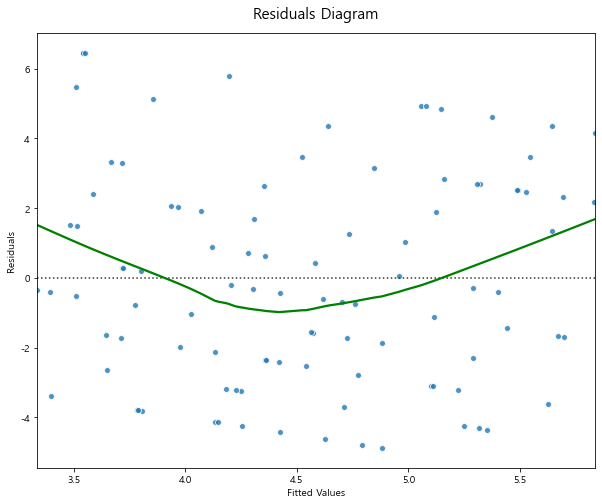

In [28]:
# 오차항의 등분산성을 확인하기 위한 플롯 형성
fig = plt.figure(figsize= (10,8))

# yhat값의 변화에 따라 오차항이 어떻게 변화하는지 육안으로 확인하는 부분 (등분산성은 yhat값과 무관하게 일정한 분산을 유지하는 형태로 도출됨)
sns.residplot(x = "yhat", y = "target", 
              data = subset, scatter_kws = {'edgecolor':"white"},
              lowess = True, line_kws = {"color":"green"})
plt.title("Residuals Diagram", fontsize=15, y=1.02)
plt.xlabel("Fitted Values")  
plt.ylabel("Residuals")
plt.show()

In [29]:
# 하나씩 시행해보기
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = sm.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

# 독립변수, featue의 values (endog는 y값)
# fitted_model.model.exog

for i in lzip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')
# which assumes independent and identically distributed
# error terms, or the original Breusch-Pagan version which assumes
# residuals are normally distributed.

# The null hypothesis (H0): Homoscedasticity is present.

Lag_range multiplier statistic :  2.298
p-value :  0.317
f-value :  1.141
f p-value :  0.324


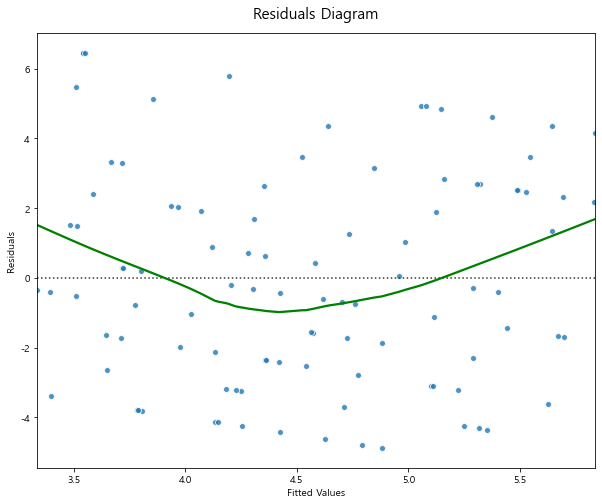

Lag_range multiplier statistic :  2.298
p-value :  0.317
f-value :  1.141
f p-value :  0.324
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [30]:
def bp_test(fitted_model, sig_level):
    # 라이브러리 호출
    from statsmodels.compat import lzip
    from statsmodels.stats.api import het_breuschpagan
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 변수설정
    yhat = fitted_model.fittedvalues
    subset = pd.concat([yhat, target], axis=1)
    subset.columns = ['yhat', 'target']
    names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
    test = het_breuschpagan(fitted_model.resid, fitted_model.model.exog)
    
    # 오차항의 등분산성을 확인하기 위한 플롯 형성
    fig = plt.figure(figsize= (10,8))
    sns.residplot(x = "yhat", y = "target", 
                data = subset, scatter_kws = {'edgecolor':"white"},
                lowess = True, line_kws = {"color":"green"})
    plt.title("Residuals Diagram", fontsize=15, y=1.02)
    plt.xlabel("Fitted Values")  
    plt.ylabel("Residuals")
    plt.show()

    for i in lzip(names, test):
        print(f'{i[0]} : {i[1] : .3f}')
        
    if test[1] > sig_level:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        print(f'오차항이 이분산(Heteroscedasticity)을 따르므로 선형회귀 모형의 가정에 어긋납니다.')

bp_test(fitted_model, 0.05)

In [31]:
# 이분산 검정 추가 (white test)
from statsmodels.stats.api import het_white

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(fitted_model.resid, fitted_model.model.exog)

print(dict(zip(labels, white_test)))

# Null (H0): Homoscedasticity is present (residuals are equally scattered)
# Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

{'Test Statistic': 3.685668483507154, 'Test Statistic p-value': 0.5954981441967798, 'F-Statistic': 0.7194211536220783, 'F-Test p-value': 0.6104471318978939}


## 오차항의 독립성

In [32]:
# 한줄씩 해보기
# 더빈왓슨 통계 (DW-test) : 0~4
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.

from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model.resid)

1.9785872282150525

In [33]:
# 한줄씩 해보기
# 잔차 정의
resids=fitted_model.resid
# DW 통계치를 구하는 공식 적용 (시차 1 적용)
diff_resids = np.diff(resids, 1, axis=0)
dw = np.sum(diff_resids**2, axis=0) / np.sum(resids**2, axis=0)
# dw 통계치 도출 완료
dw

1.9785872282150525

## DW 검정에 대한 설명
The test statistic is approximately equal to 2*(1-r) where ``r`` is the
sample autocorrelation of the residuals. Thus, for r == 0, indicating no
serial correlation, the test statistic equals 2. This statistic will
always be between 0 and 4. The closer to 0 the statistic, the more
evidence for positive serial correlation. The closer to 4, the more
evidence for negative serial correlation.

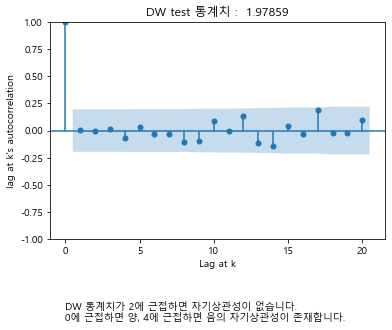

In [34]:
def autocorr_resid(fitted_model):
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson

    # 오차항의 자기상관성 검정
    plot_acf(fitted_model.resid)
    plt.xlabel('Lag at k')
    plt.ylabel("lag at k's autocorrelation")
    plt.title(f'DW test 통계치 : {durbin_watson(resids=fitted_model.resid) : .5f}')
    plt.text(y=-1.75,x=0, s='DW 통계치가 2에 근접하면 자기상관성이 없습니다.\n0에 근접하면 양, 4에 근접하면 음의 자기상관성이 존재합니다.')
    plt.show()

autocorr_resid(fitted_model)   

##  오차항의 정규성

In [35]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)

from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(fitted_model.resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  4.89071
p값 :  0.08670


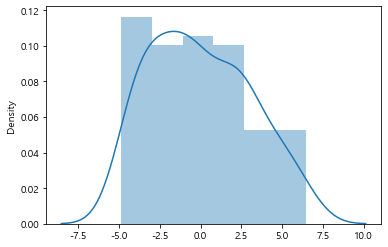

In [36]:
# 오차항 시각화
sns.distplot(fitted_model.resid)
plt.show()

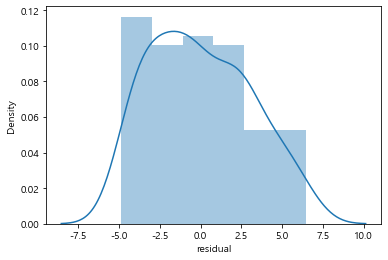

검정통계치 :  4.89071
p값 :  0.08670
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [37]:
def normal_test(fitted_model, sig_level):
   
# 정규성 검정 (귀무가설 : 정규성를 따른다)
    
    from scipy.stats import jarque_bera
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    sns.distplot(fitted_model.resid)
    plt.xlabel('residual')
    plt.show()
    
    statistic, pvalue = jarque_bera(fitted_model.resid)
    print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')
    if pvalue > sig_level:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        
normal_test(fitted_model, .05)


# 변수선택법

In [38]:
# 1. 전진선택법(Feedforward Selection)은 변수 하나부터 변수 개수를 하나씩 추가해가며 성능지표를 비교해가는 방법.
# # --> 변수1 --> 변수2--> 변수3
# 2.후진제거법(Backward Elimination)은 전체 변수부터 변수 개수를 제거해가며 성능지표를 비교해가는 방법
## --> 변수를 전부 입력 후 -> 유의하지 않은 것을 하나씩 제거해나가는 방법

# 3. Stepwise :     Back + Forward
# 가장 유의한 변수를 추가하거나 유의하지 않는 변수를 제거해나가는 방법
# # 전진선택법의 각 단계에서 이미 선택된 변수들의 중요도를 다시 검사하여 중요하지 않은 변수를 제거하는 방법

In [39]:
# 삼성전자, 하이닉스, 네이버, 카카오 KOSPI 데이터 불러오기
crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


## 전진선택법

In [40]:
# 하나씩 해보기
## 전진 단계별 선택법

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 변수 설정
target = crime_list["범죄건수"]
feature = crime_list[["나이","소득"]]
variables = feature.columns.tolist()
y = target

# 선택된 변수들 list 생성
forward_valriables = []

# 전진선택시 P 값을 고려할 때, 선택과 제거 임계치 설정    
sl_enter = 0.05
sl_remove = 0.05

# 각 스텝별로 선택된 변수들
sv_per_step = [] 
# 각 스텝별 수정된 결정계수
adj_r_squared_list = []
# 스텝
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[forward_valriables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit(disp=0)
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = feature[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_valriables.copy())
    else:
        break

In [41]:
# 최종 모형 도출
X = sm.add_constant(crime_list[forward_valriables])
model = sm.OLS(y, X).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.836
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0302
Time:                        14:47:57   Log-Likelihood:                -253.75
No. Observations:                 100   AIC:                             511.5
Df Residuals:                      98   BIC:                             516.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3965      0.899      7.115      0.000       4.612       8.181
나이            -0.0373      0.017     -2.199      0.030      -0.071      -0.004
==============================================================================
Omnibus:                       10.378   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.613
Skew:                           0.274   Prob(JB):                       0.0996
Kurtosis:                       2.102   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

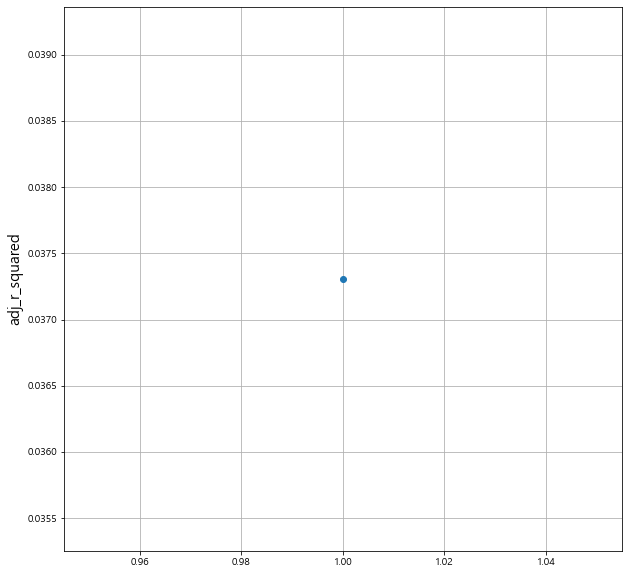

In [42]:
# 스텝별로 조정된 결정계수를 출력하는 표 시각화
fig = plt.figure(figsize=(10,10))
plt.plot(steps, adj_r_squared_list, marker='o')
plt.ylabel('adj_r_squared',fontsize=15)
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   범죄건수   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.836
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0302
Time:                        14:47:58   Log-Likelihood:                -253.75
No. Observations:                 100   AIC:                             511.5
Df Residuals:                      98   BIC:                             516.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3965      0.899      7.115      0.0

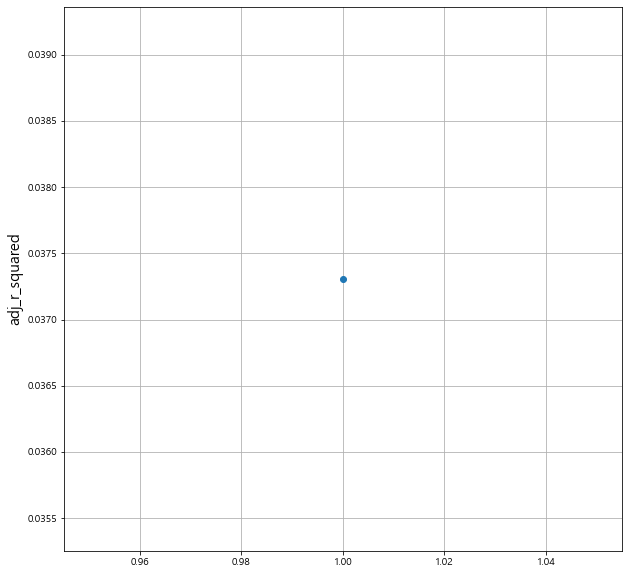

In [43]:
def forward_feature_selection(feature, target, sl_enter=.05, sl_remove=.05):
    ## 전진 단계별 선택법

    import statsmodels.api as sm
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    # 변수 설정
    variables = feature.columns.tolist() 
    # 선택된 변수들 list 생성
    forward_valriables = []
    # 각 스텝별로 선택된 변수들
    sv_per_step = [] 
    # 각 스텝별 수정된 결정계수
    adj_r_squared_list = []
    # 스텝
    steps = []
    step = 0

    while len(variables) > 0:
        remainder = list(set(variables) - set(forward_valriables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[forward_valriables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(target,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            forward_valriables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(forward_valriables) > 0:
                selected_X = feature[forward_valriables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(target,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    forward_valriables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(target,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
            adj_r_squared_list.append(adj_r_squared)
            sv_per_step.append(forward_valriables)
        else:
            break

    # 최종 모형 도출
    model = sm.OLS(target, sm.add_constant(crime_list[forward_valriables])).fit(disp=0)
    print(model.summary())

    # 스텝별로 조정된 결정계수를 출력하는 표 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()
    
    return model
    
forward_model = forward_feature_selection(feature, target)

## 후진제거법
모든 독립변수 입력 후 --> 유의하지 않은 변수를 하나씩 제거를 하는 방법

                            OLS Regression Results                            
Dep. Variable:                   범죄건수   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.836
Date:                Thu, 03 Aug 2023   Prob (F-statistic):             0.0302
Time:                        13:58:54   Log-Likelihood:                -253.75
No. Observations:                 100   AIC:                             511.5
Df Residuals:                      98   BIC:                             516.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3965      0.899      7.115      0.0

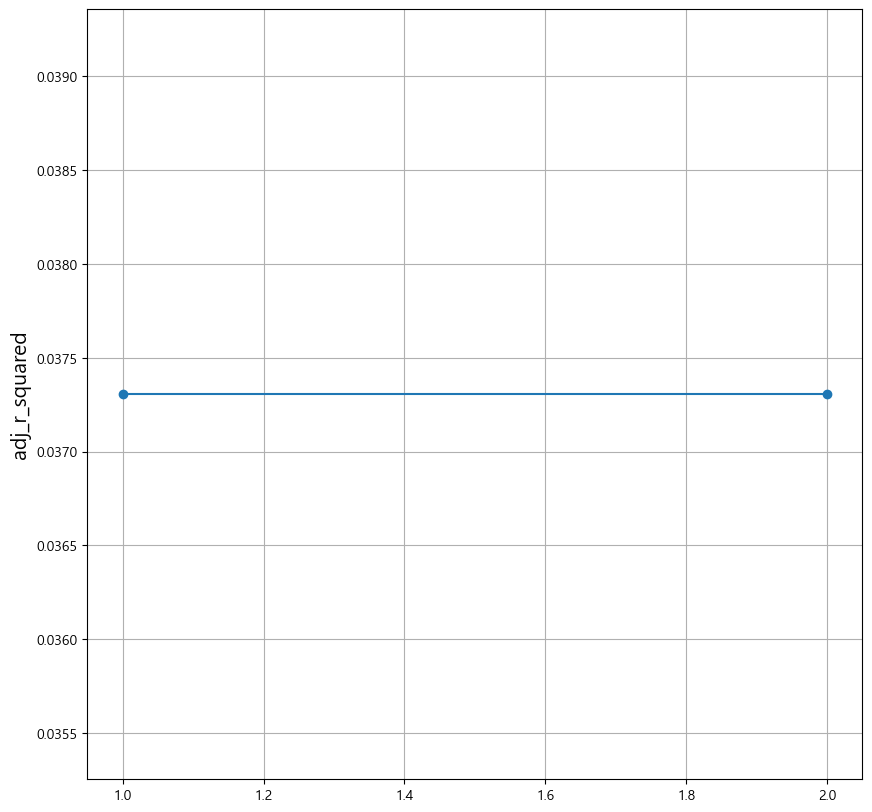

In [50]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())

    
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(feature, target)

## 단계적 선택법

                            OLS Regression Results                            
Dep. Variable:                   범죄건수   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.836
Date:                Thu, 03 Aug 2023   Prob (F-statistic):             0.0302
Time:                        13:58:55   Log-Likelihood:                -253.75
No. Observations:                 100   AIC:                             511.5
Df Residuals:                      98   BIC:                             516.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3965      0.899      7.115      0.0

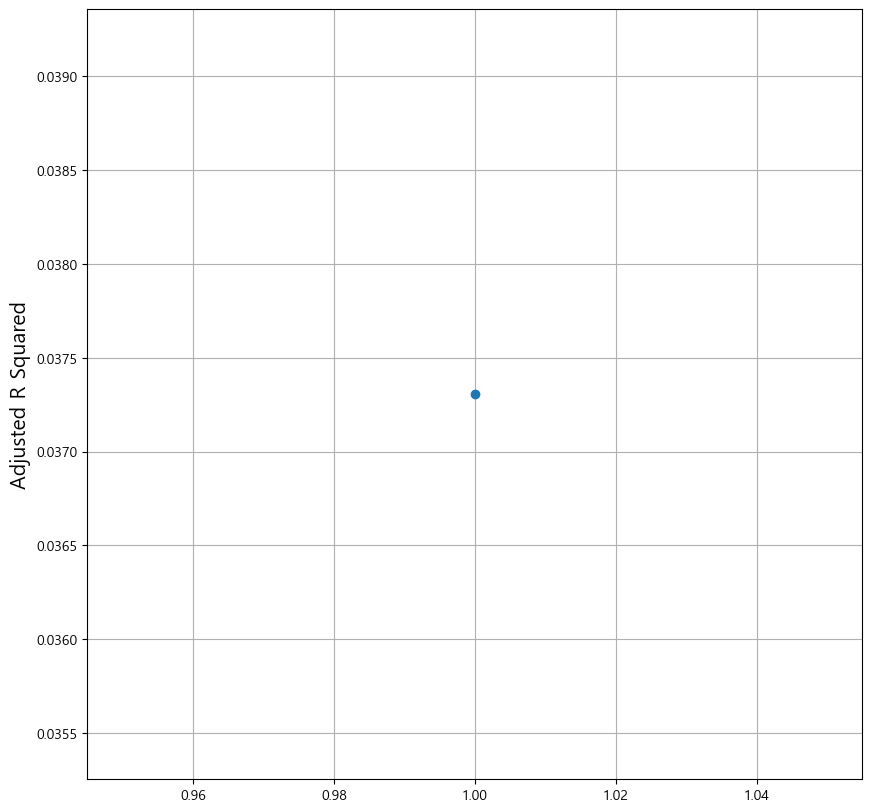

In [51]:
def stepwise_feature_selection(feature, target, variables=feature.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    model = sm.OLS(y, sm.add_constant(feature[selected_variables])).fit()
    print(model.summary())
    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps,adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

stepwise_model = stepwise_feature_selection(feature, target)